In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


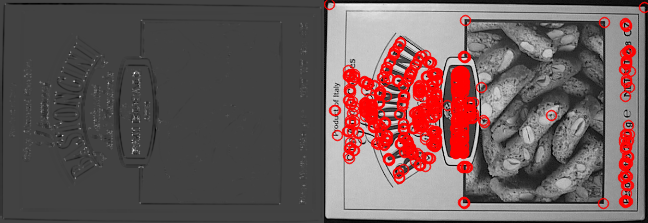

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pylab as plt

BASE_URL = '/content/mydrive/MyDrive/ComputerVision/Lab3Image/'

img = cv.imread(BASE_URL+'box.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 해리스 코너 검출 --- 1
corner = cv.cornerHarris(gray, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기 --- 2
coord = np.where(corner > 0.1 * corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그라미 그리기 --- 3
for x, y in coord:
  cv.circle(img, (x, y), 5, (0,0,255), 1, cv.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0-255로 정규화 --- 4
corner_norm = cv.normalize(corner, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

# 화면에 출력
corner_norm = cv.cvtColor(corner_norm, cv.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))

cv2_imshow(merged)

cv.waitKey()
cv.destroyAllWindows()
